Random Forest

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, make_scorer, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# Load dataset
data = pd.read_csv(r'C:\Users\iness\OneDrive\Ambiente de Trabalho\FAA_1\diabetes.csv')

# Pre-processing
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
data.fillna(data.median(), inplace=True)

# Separate the independent (X) and dependent (y) variables
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Division of data into training and testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model 1: Random Forest (Base)
model_rf_baseline = RandomForestClassifier(random_state=42)
model_rf_baseline.fit(X_train, y_train)

# Prediction and metrics for the base model
y_pred_baseline = model_rf_baseline.predict(X_test)
accuracy_rf_baseline = accuracy_score(y_test, y_pred_baseline)
report_baseline = classification_report(y_test, y_pred_baseline, output_dict=True)

In [ ]:
# Model 2: Random Forest (Optimized)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Prediction and metrics for the optimized model
y_pred_optimized = grid_search_rf.predict(X_test)
accuracy_rf_optimized = accuracy_score(y_test, y_pred_optimized)
report_optimized = classification_report(y_test, y_pred_optimized, output_dict=True)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [ ]:
# Model 3: Random Forest (Cross Validation)
cv_results = cross_validate(model_rf_baseline, X, y, cv=5, 
                            scoring={'accuracy': make_scorer(accuracy_score),
                                     'precision': make_scorer(precision_score),
                                     'recall': make_scorer(recall_score),
                                     'f1': make_scorer(f1_score)}, 
                            return_train_score=False)

# Calculation of average cross-validation metrics
mean_accuracy_cv = np.mean(cv_results['test_accuracy'])
mean_precision_cv = np.mean(cv_results['test_precision'])
mean_recall_cv = np.mean(cv_results['test_recall'])
mean_f1_cv = np.mean(cv_results['test_f1'])

                              Modelo  Acurácia  Precision (Não-Diabetes)  \
0               Random Forest (Base)  0.746753                  0.812500   
1          Random Forest (Otimizado)  0.746753                  0.812500   
2  Random Forest (Validação Cruzada)  0.764383                  0.692101   

   Recall (Não-Diabetes)  F1-Score (Não-Diabetes)  Precision (Diabetes)  \
0               0.787879                 0.800000              0.637931   
1               0.787879                 0.800000              0.637931   
2               0.589658                 0.634572              0.692101   

   Recall (Diabetes)  F1-Score (Diabetes)  
0           0.672727             0.654867  
1           0.672727             0.654867  
2           0.589658             0.634572  


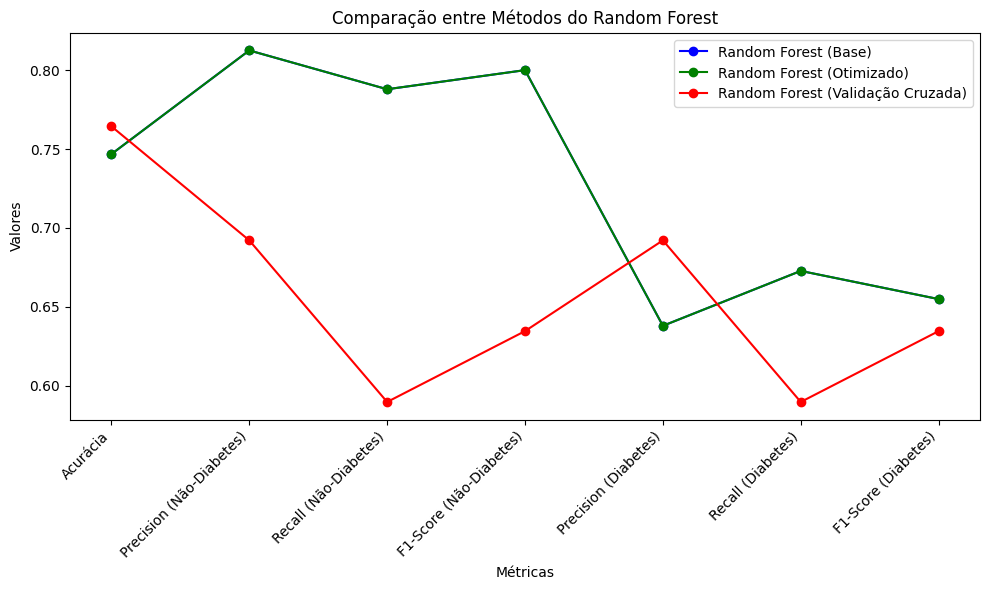

In [ ]:
# Organize the Results
results = {
    'Modelo': ['Random Forest (Base)', 'Random Forest (Otimizado)', 'Random Forest (Validação Cruzada)'],
    'Acurácia': [accuracy_rf_baseline, accuracy_rf_optimized, mean_accuracy_cv],
    'Precision (Não-Diabetes)': [report_baseline['0']['precision'], report_optimized['0']['precision'], mean_precision_cv],
    'Recall (Não-Diabetes)': [report_baseline['0']['recall'], report_optimized['0']['recall'], mean_recall_cv],
    'F1-Score (Não-Diabetes)': [report_baseline['0']['f1-score'], report_optimized['0']['f1-score'], mean_f1_cv],
    'Precision (Diabetes)': [report_baseline['1']['precision'], report_optimized['1']['precision'], mean_precision_cv],
    'Recall (Diabetes)': [report_baseline['1']['recall'], report_optimized['1']['recall'], mean_recall_cv],
    'F1-Score (Diabetes)': [report_baseline['1']['f1-score'], report_optimized['1']['f1-score'], mean_f1_cv],
}

# Create the DataFrame with the results
results_df = pd.DataFrame(results)

print(results_df)

# Line Chart Comparing Methods
import matplotlib.pyplot as plt

# Define the data for the chart
metrics = ['Acurácia', 'Precision (Não-Diabetes)', 'Recall (Não-Diabetes)', 
           'F1-Score (Não-Diabetes)', 'Precision (Diabetes)', 'Recall (Diabetes)', 'F1-Score (Diabetes)']

# Collect values ​​for each metric
baseline_values = [accuracy_rf_baseline, report_baseline['0']['precision'], report_baseline['0']['recall'], 
                   report_baseline['0']['f1-score'], report_baseline['1']['precision'], 
                   report_baseline['1']['recall'], report_baseline['1']['f1-score']]

optimized_values = [accuracy_rf_optimized, report_optimized['0']['precision'], report_optimized['0']['recall'], 
                    report_optimized['0']['f1-score'], report_optimized['1']['precision'], 
                    report_optimized['1']['recall'], report_optimized['1']['f1-score']]

cv_values = [mean_accuracy_cv, mean_precision_cv, mean_recall_cv, mean_f1_cv, mean_precision_cv, mean_recall_cv, mean_f1_cv]


plt.figure(figsize=(10, 6))

plt.plot(metrics, baseline_values, marker='o', label='Random Forest (Base)', color='b')
plt.plot(metrics, optimized_values, marker='o', label='Random Forest (Otimizado)', color='g')
plt.plot(metrics, cv_values, marker='o', label='Random Forest (Validação Cruzada)', color='r')

plt.title('Comparação entre Métodos do Random Forest')
plt.xlabel('Métricas')
plt.ylabel('Valores')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()
